In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Font and styles
pd.set_option('display.max_columns', None)
%matplotlib inline 

from keras.callbacks import EarlyStopping, ModelCheckpoint
# Imputing model
from sklearn.impute import SimpleImputer

# Splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score

# Oversampling and undersampling the data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (f1_score,
                            precision_score,
                            accuracy_score,
                            recall_score,
                            confusion_matrix,
                            roc_auc_score)

import keras
from sklearn.pipeline import Pipeline

# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

2023-10-31 21:48:25.125076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('Train.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,-5.714719,0.735893,0.981251,1.417884,-3.375815,-3.047303,0.306194,2.914097,2.269979,4.394876,-2.388299,0.646388,-1.190508,3.132986,0.665277,-2.510846,-0.036744,0.726218,-3.982187,-1.072638,1.667098,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,-2.909996,-2.568662,4.109032,1.316672,-1.620594,-3.827212,-1.616970,0.669006,0.387045,0.853814,-6.352826,4.271718,3.162020,0.257559,-3.547127,-4.284533,2.897271,1.508313,3.667963,7.123824,-4.095749,1.015082,-0.969790,-0.968207,2.063871,-1.646110,0.426956,0.734860,-4.470201,-2.771871,-2.504884,-3.782686,-6.823172,4.908562,0.481554,5.338051,2.381297,-3.127756,3.527309,-3.019581,0
2,4.283674,5.105381,6.092238,2.639922,-1.041357,1.308419,-1.876140,-9.582412,3.469504,0.763395,-2.573231,-3.349664,-0.594666,-5.246841,-4.309957,-16.232431,-0.999690,2.318208,5.941888,-3.857972,-11.599497,4.021252,-6.281194,4.633167,0.930157,6.280225,0.850654,0.268846,-2.206445,-1.328828,-2.398515,-3.097934,2.690334,-1.643048,7.566482,-3.197647,-3.495672,8.104779,0.562085,-4.227426,0
3,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,1.914465,-0.951458,-1.255259,-2.706522,0.193223,-4.769379,-2.205319,0.907716,0.756894,-5.833678,-3.065122,1.596647,-1.757311,1.766444,-0.267098,3.625036,1.500346,-0.585712,0.783034,-0.201217,0.024883,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
4,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,-0.770673,1.106718,1.144261,0.943301,-3.163804,-4.247825,-4.038909,3.688534,3.311196,1.059002,-2.143026,1.650120,-1.660592,1.679910,-0.450782,-4.550695,3.738779,1.134404,-2.033531,0.840839,-1.600395,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0


In [3]:
df.isna().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [4]:
mean_v1 = df['V1'].mean()
mean_v2 = df['V2'].mean()

In [5]:
df.V1.fillna(mean_v1, inplace=True)
df.V2.fillna(mean_v2, inplace=True)

In [6]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [7]:
X = df.iloc[:,:-1]
y = df['Target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 40)
(8000, 40)
(32000,)
(8000,)


In [10]:
def min_model_cost(y_train,y_pred):
    y_pred = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    cost = (TP*15) + (FP*5) + (FN*40)
    min_cost = (TP+FN)*15
    percent = min_cost / cost
    return percent
scorer = metrics.make_scorer(min_model_cost,greater_is_better=True)

In [11]:
def min_model_cost1(y_train,y_pred):
    y_pred = (y_pred > 0.42).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    cost = (TP*15) + (FP*5) + (FN*40)
    min_cost = (TP+FN)*15
    percent = min_cost / cost
    return percent
scorer = metrics.make_scorer(min_model_cost,greater_is_better=True)

In [12]:
def maintanence_cost(model, x, y):
    pred = model.predict(x)
    pred_binary = (pred > 0.5).astype(int)
    cm = confusion_matrix(y, pred_binary)
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    cost = (TP*15) + (FP*5) + (FN*40)
    min_cost = (TP+FN)*15
    percent = min_cost / cost
    
    
    
    acc = accuracy_score(y,pred_binary)
    precision = precision_score(y,pred_binary)
    recall = recall_score(y,pred_binary)
    f1 = f1_score(y,pred_binary)
    
    df_metrics = pd.DataFrame({'Accuracy':acc ,
                               'Precision':precision,
                               'Recall':recall,
                               'F1_score':f1,
                               'Model_Cost':percent}, index=[0])
    return df_metrics

In [13]:
def maintanence_cost1(model, x, y):
    pred = model.predict(x)
    pred_binary = (pred > 0.42).astype(int)
    cm = confusion_matrix(y, pred_binary)
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    cost = (TP*15) + (FP*5) + (FN*40)
    min_cost = (TP+FN)*15
    percent = min_cost / cost
    
    
    
    acc = accuracy_score(y,pred_binary)
    precision = precision_score(y,pred_binary)
    recall = recall_score(y,pred_binary)
    f1 = f1_score(y,pred_binary)
    
    df_metrics = pd.DataFrame({'Accuracy':acc ,
                               'Precision':precision,
                               'Recall':recall,
                               'F1_score':f1,
                               'Model_Cost':percent}, index=[0])
    return df_metrics

In [14]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(target, y_pred_binary)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [15]:
def confusion_matrix_sklearn1(model, predictors, target):
    y_pred = model.predict(predictors)
    y_pred_binary = (y_pred > 0.42).astype(int)
    cm = confusion_matrix(target, y_pred_binary)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="", color = 'blue')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [16]:
def neural_network(x,y):
    model = keras.Sequential([
        keras.layers.Dense(256, input_shape=(x.shape[1],), activation='relu'),
        keras.layers.Dropout(0.5), 
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x, y, epochs=50, batch_size=64, validation_split=0.2)
    return model

In [17]:
nn_model = neural_network(X_train, y_train)

2023-10-31 21:48:29.718342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.2044 - accuracy: 0.9423 - val_loss: 0.0966 - val_accuracy: 0.9777
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1169 - accuracy: 0.9718 - val_loss: 0.0737 - val_accuracy: 0.9830
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0920 - accuracy: 0.9810 - val_loss: 0.0633 - val_accuracy: 0.9862
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9834 - val_loss: 0.0595 - val_accuracy: 0.9877
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0746 - accuracy: 0.9853 - val_loss: 0.0575 - val_accuracy: 0.9894
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0753 - accuracy: 0.9854 - val_loss: 0.0534 - val_accuracy: 0.9900
Epoch 7/50
400/400 [==============================] - 1s 1ms/step - loss: 0.0675 - accuracy: 0.9861 - val_loss: 0.0500 - val_accuracy: 0.9912
Epoch 

In [18]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

250/250 [==============================] - 0s 852us/step - loss: 0.0506 - accuracy: 0.9930
Test accuracy: 0.9929999709129333


In [19]:
y_pred = nn_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

250/250 [==============================] - 0s 600us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7551
           1       0.97      0.90      0.94       449

    accuracy                           0.99      8000
   macro avg       0.98      0.95      0.97      8000
weighted avg       0.99      0.99      0.99      8000



In [20]:
maintanence_cost(nn_model, X_train, y_train)

1000/1000 [==============================] - 1s 528us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.993281,0.986581,0.888377,0.934908,0.84029


In [21]:
maintanence_cost(nn_model, X_test, y_test)

250/250 [==============================] - 0s 547us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.993,0.971223,0.902004,0.935335,0.853072


1000/1000 [==============================] - 1s 630us/step


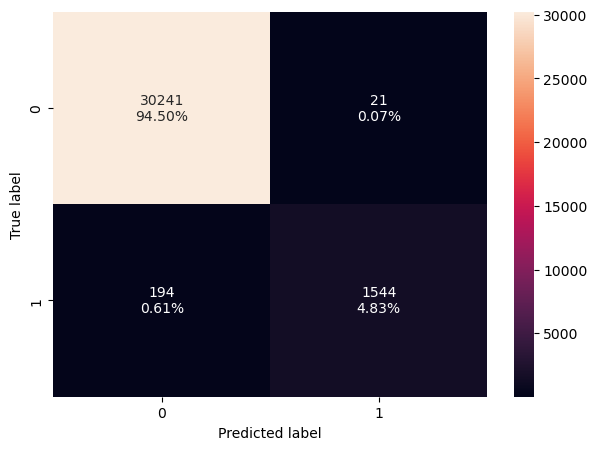

In [22]:
confusion_matrix_sklearn(nn_model, X_train, y_train)

1000/1000 [==============================] - 1s 571us/step


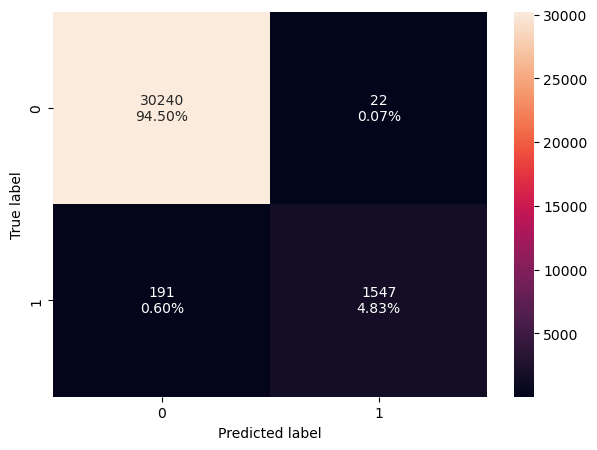

In [23]:
confusion_matrix_sklearn1(nn_model, X_train, y_train)

## Cross validation

In [24]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [25]:
X1 = X.values

In [26]:
acc_score = []

KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_fold, X_test_fold = X1[train_index], X1[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    nn_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    Y_pred = nn_model.predict(X_test_fold)
    accuracy = min_model_cost(y_test_fold,Y_pred)
    acc_score.append(accuracy)

250/250 [==============================] - 0s 560us/step


In [27]:
acc_score

[0.862876254180602,
 0.7878605769230769,
 0.8131868131868132,
 0.8252858958068615,
 0.8290704928259514]

In [28]:
print('ANN cross validation result: ', np.mean(acc_score))

ANN cross validation result:  0.8236560065846611


## Over sampling

In [29]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [30]:
print('Failure (1) before over sampling {}, after {}'.format(sum(y_train == 1), sum(y_train_over == 1)))
print('Sucess (0) before over sampling {} after {}'.format(sum(y_train == 0), sum(y_train_over == 0)))

Failure (1) before over sampling 1738, after 30262
Sucess (0) before over sampling 30262 after 30262


In [31]:
X_train_over = X_train_over.values

In [39]:
acc_score_over = []

KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_fold, X_test_fold = X_train_over[train_index], X_train_over[test_index]
    y_train_fold, y_test_fold = y_train_over[train_index], y_train_over[test_index]

    nn_model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=32, verbose=0)
    Y_pred = nn_model.predict(X_test_fold)
    accuracy = min_model_cost(y_test_fold,Y_pred)
    acc_score_over.append(accuracy)

250/250 [==============================] - 0s 483us/step


In [40]:
acc_score_over

[0.8899279472635291,
 0.881427072402938,
 0.875779230652273,
 0.8688476705126332,
 0.8741363772904777]

In [41]:
print('ANN over sampled cross validation result: ', np.mean(acc_score_over))

ANN over sampled cross validation result:  0.8780236596243702


## Under sampling

In [35]:
rms = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rms.fit_resample(X_train,y_train)

In [36]:
print('Failure (1) before over sampling {}, after {}'.format(sum(y_train == 1), sum(y_train_under == 1)))
print('Sucess (0) before over sampling {} after {}'.format(sum(y_train == 0), sum(y_train_under == 0)))

Failure (1) before over sampling 1738, after 1738
Sucess (0) before over sampling 30262 after 1738


In [37]:
acc_score_under = []

KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_fold, X_test_fold = X_train_over[train_index], X_train_over[test_index]
    y_train_fold, y_test_fold = y_train_over[train_index], y_train_over[test_index]

    nn_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    Y_pred = nn_model.predict(X_test_fold)
    accuracy = min_model_cost(y_test_fold,Y_pred)
    acc_score_under.append(accuracy)

250/250 [==============================] - 0s 491us/step


In [38]:
acc_score_under

[0.8912943344081069,
 0.8866103739445115,
 0.8781826497941759,
 0.8710102489019034,
 0.8754512635379061]

In [161]:
print('ANN under sampled cross validation result: ', np.mean(acc_score_under))

ANN under sampled cross validation result:  0.8806119973405909


## Test data

In [162]:
df_test = pd.read_csv('Test.csv')
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,-5.122874,1.017021,4.818549,3.269001,-2.984330,1.387370,2.032002,-0.511587,-1.023069,7.338733,-2.242244,0.155489,2.053786,-2.772273,1.851369,-1.788696,-0.277282,-1.255143,-3.832886,-1.504542,1.586765,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,-0.732692,2.209513,8.083006,7.062533,-1.510459,-3.260527,-3.333773,-3.018543,3.556598,-1.510685,-6.694697,-1.936701,0.141019,-3.471372,-4.233177,-10.416455,5.479431,-0.022955,6.036333,6.603463,-8.319705,0.104421,-6.878574,1.457221,2.109761,3.380861,-4.467338,0.995777,-1.409203,-0.694051,-2.577301,-3.270366,-1.806367,1.797525,5.895108,-1.312278,-0.765156,-1.407807,0.557128,-4.049262,0
2,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,1.796544,0.410490,0.638328,-1.389600,-1.883410,-5.017922,-3.827238,2.418060,1.762285,-3.242297,-3.192960,1.857454,-1.707954,0.633444,-0.587898,0.083683,3.013935,-0.182309,0.223917,0.865228,-1.782158,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
3,3.412089,1.153345,2.114167,-2.275466,0.087845,-0.009578,0.514235,-1.370917,1.862913,-0.031132,-0.413716,-1.566748,3.183819,0.864431,-0.417157,-0.995751,-3.086726,-0.648430,-2.731857,-2.056434,-1.620290,-0.091157,-1.511600,-3.891854,1.645565,3.146990,4.441590,-2.523508,-2.434027,-4.086404,2.828084,-2.496609,-1.776174,-1.712035,-1.506021,2.242186,-0.657637,-1.861584,0.845768,0.857333,0
4,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,-4.928214,3.565070,-0.449329,-0.656246,-0.166537,-1.630207,2.291865,2.396492,0.601278,1.793534,-2.120238,0.481968,-0.840707,1.790197,1.874395,0.363930,-0.169063,-0.483832,-2.118982,-2.156586,2.907291,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0


In [163]:
df_test.isna().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [164]:
mean_v1_test = df_test['V1'].mean()
mean_v2_test = df_test['V2'].mean()

In [165]:
df_test['V1'].fillna(mean_v1_test, inplace=True)
df_test['V2'].fillna(mean_v2_test, inplace=True)

In [166]:
df_test.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [167]:
X_test_df = df_test.iloc[:,:-1]
y_test_df = df_test['Target']

In [168]:
print(X_test_df.shape)
print(y_test_df.shape)

(10000, 40)
(10000,)


In [187]:
maintanence_cost(nn_model,X_test_df,y_test_df)

313/313 [==============================] - 0s 512us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.9924,0.975758,0.882998,0.927063,0.831728


In [194]:
maintanence_cost1(nn_model, X_test_df, y_test_df)

313/313 [==============================] - 0s 500us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.9923,0.97379,0.882998,0.926174,0.831307


313/313 [==============================] - 0s 499us/step


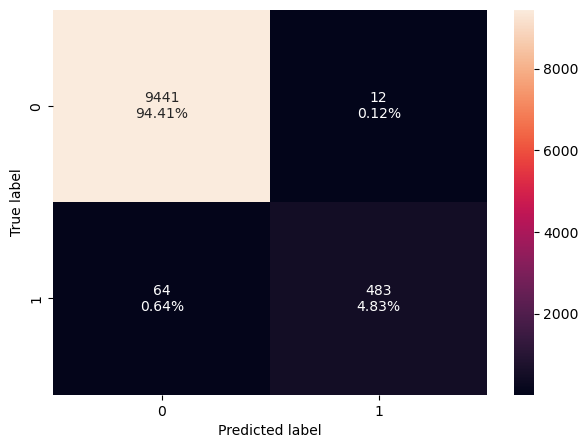

In [170]:
confusion_matrix_sklearn(nn_model, X_test_df, y_test_df)

313/313 [==============================] - 0s 500us/step


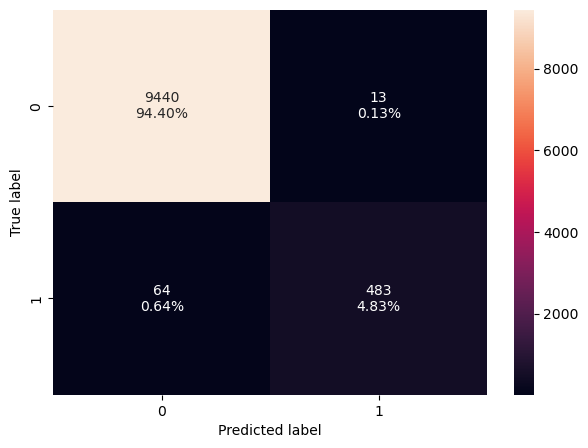

In [193]:
confusion_matrix_sklearn1(nn_model,X_test_df, y_test_df )

## Pipeline to build the final model

In [176]:
model_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='mean')),
    ('Neural network', neural_network(X,y))
])

model_pipeline.fit(X,y)

Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 0.2049 - accuracy: 0.9416 - val_loss: 0.0902 - val_accuracy: 0.9818
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.1124 - accuracy: 0.9749 - val_loss: 0.0676 - val_accuracy: 0.9860
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.0948 - accuracy: 0.9815 - val_loss: 0.0660 - val_accuracy: 0.9875
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 0.0832 - accuracy: 0.9842 - val_loss: 0.0545 - val_accuracy: 0.9900
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9850 - val_loss: 0.0523 - val_accuracy: 0.9895
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 0.0741 - accuracy: 0.9857 - val_loss: 0.0533 - val_accuracy: 0.9901
Epoch 7/50
500/500 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9872 - val_loss: 0.0510 - val_accuracy: 0.9909
Epoch 

Pipeline(steps=[('Imputer', SimpleImputer()),
                ('Neural network',
                 <keras.engine.sequential.Sequential object at 0x7fd0ee5eca90>)])

In [177]:
min_model_cost(y_test_df, model_pipeline.predict(X_test_df))

313/313 [==============================] - 0s 500us/step


0.8091715976331361

In [178]:
min_model_cost1(y_test_df, model_pipeline.predict(X_test_df))

313/313 [==============================] - 0s 488us/step


0.8111715274345032

In [186]:
maintanence_cost(model_pipeline, X_test_df, y_test_df)

313/313 [==============================] - 0s 501us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.9917,0.985356,0.86106,0.919024,0.809172


In [185]:
maintanence_cost1(model_pipeline, X_test_df, y_test_df)

313/313 [==============================] - 0s 502us/step


,Accuracy,Precision,Recall,F1_score,Model_Cost
0,0.9918,0.985386,0.862888,0.920078,0.811172
